In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kulwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Load the dataset into a DataFrame
df1 = pd.read_csv('zomato.csv')  # Replace 'zomato.csv' with your file path
df = df1.copy()
# Display the first few rows to understand the structure
print(df.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [4]:
# Check the data types of each column
print(df.dtypes)

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


In [5]:
# Check for missing values in each column
print("Null Values: ")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Check for duplicates in the DataFrame
print("Duplicate Values: ",end="")
print(df.duplicated().sum())

# Check for duplicates in key columns like 'name', 'address', and 'url'
print(df[['name', 'address', 'url']].duplicated().sum())

Null Values: 
rate                            7775
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
dtype: int64
Duplicate Values: 0
0


Removing Null Values

In [6]:
print("Total data before removing null values: ",df.shape[0])
df.info()
#Removing null values
df.dropna(inplace=True)
print("\n\n")
print("Null values removed.")
df.info()

Total data before removing null values:  51717
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-nu

In [7]:
df['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51705    1,200
51707    2,000
51708    1,200
51711      800
51715    2,500
Name: approx_cost(for two people), Length: 23193, dtype: object

Variable changing (string --> float)

In [8]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str) 
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',','.'))      #changeing ',' to '.' 
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

Removing "/5" from rates and making it float

In [9]:
#Removing '/5' from Rates
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if isinstance(x, str) else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')

C:\Users\kulwa\AppData\Local\Temp\ipykernel_7244\882604132.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.rate,kde=False,color = 'g',ax =ax,bins=20);


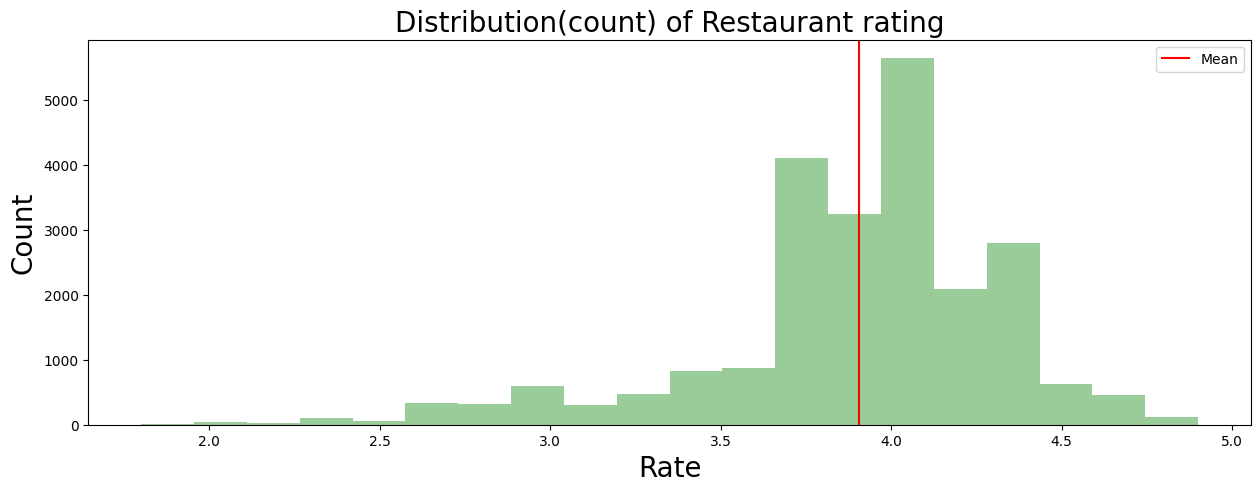

In [10]:
#Distribution of Restaurant Rating 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(df.rate,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(df.rate.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Rate',size=20)
ax.set_title('Distribution(count) of Restaurant rating',size=20);

               rate         votes  approx_cost(for two people)
count  23046.000000  23046.000000                 23046.000000
mean       3.904383    604.908444                   379.314872
std        0.426365   1117.367014                   280.135573
min        1.800000      0.000000                     1.000000
25%        3.800000    103.000000                     3.000000
50%        4.000000    224.000000                   400.000000
75%        4.200000    591.000000                   600.000000
max        4.900000  16832.000000                   950.000000


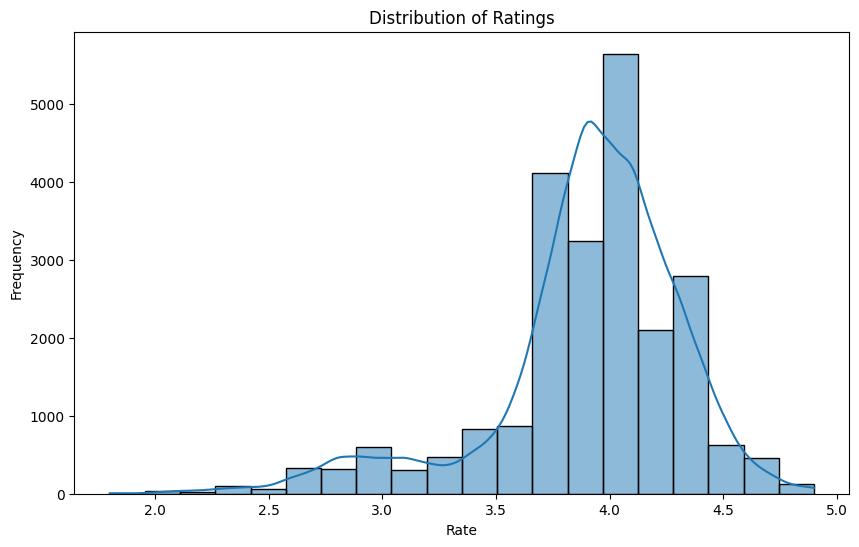

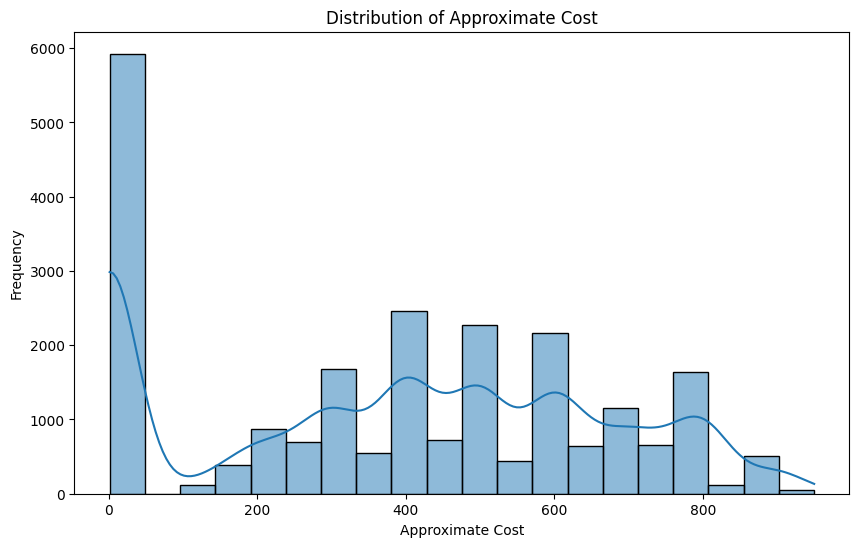

In [11]:
# Generate basic statistics for numerical columns
print(df[['rate', 'votes', 'approx_cost(for two people)']].describe())

# Plot distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], kde=True, bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of approximate cost
plt.figure(figsize=(10, 6))
sns.histplot(df['approx_cost(for two people)'], kde=True, bins=20)
plt.title('Distribution of Approximate Cost')
plt.xlabel('Approximate Cost')
plt.ylabel('Frequency')
plt.show()


Calculating the 'weighted_rates' based on the number of votes that a restaurant get

In [12]:
# Calculate the weighted rating as before
w_r = 1  # Weight for rating
w_v = 1.2  # Weight for votes
C = 10   # Constant for smoothing

# Calculate the weighted rating
df['Weighted Rating'] = ((w_r * df['rate'] * df['votes']) + (w_v * C * df['votes'])) / (df['votes'] + C)

# Find the min and max of the current weighted ratings
min_rating = df['Weighted Rating'].min()
max_rating = df['Weighted Rating'].max()

# Normalize to the range 0-5 using Min-Max scaling
df['Normalized Rating'] = 5 * (df['Weighted Rating'] - min_rating) / (max_rating - min_rating)

# Optional: If you want to clip the values to ensure they are between 0 and 5, you can use:
df['Normalized Rating'] = df['Normalized Rating'].clip(0, 5)


In [13]:
# df.loc[22665]
# print(df[['name', 'rate', 'votes', 'Weighted Rating','Normalized Rating']])

df[['name', 'rate', 'votes', 'Weighted Rating','Normalized Rating']]

,name,rate,votes,Weighted Rating,Normalized Rating
0,Jalsa,4.1,775,15.894904,4.705428
1,Spice Elephant,4.1,787,15.897992,4.706342
2,San Churro Cafe,3.8,918,15.629741,4.626931
3,Addhuri Udupi Bhojana,3.7,88,14.097959,4.173472
4,Grand Village,3.8,166,14.902273,4.411576
...,...,...,...,...,...
23041,Izakaya Gastro Pub,3.8,128,14.655072,4.338396
23042,M Bar - Bengaluru Marriott Hotel Whitefield,3.9,77,14.072414,4.165910
23043,Keys Cafe - Keys Hotel,2.8,161,13.934503,4.125083
23044,Bhagini,2.5,81,12.906593,3.820787


dropping non-essential attributes

In [14]:
df = df.drop(['url','phone','address','listed_in(type)','menu_item','listed_in(type)'],axis=1) #dropping the columns
df = df.drop(['listed_in(city)'],axis=1) #dropping the columns

In [15]:
df['cuisines']

0                     North Indian, Mughlai, Chinese
1                        Chinese, North Indian, Thai
2                             Cafe, Mexican, Italian
3                         South Indian, North Indian
4                           North Indian, Rajasthani
                            ...                     
23041       North Indian, Continental, Mediterranean
23042                                    Finger Food
23043             Chinese, Continental, North Indian
23044    Andhra, South Indian, Chinese, North Indian
23045                                    Finger Food
Name: cuisines, Length: 23046, dtype: object

Frequecy of dishes

C:\Users\kulwa\AppData\Local\Temp\ipykernel_7244\2386514187.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Cuisine', data=cuisine_df.head(15), palette='viridis')


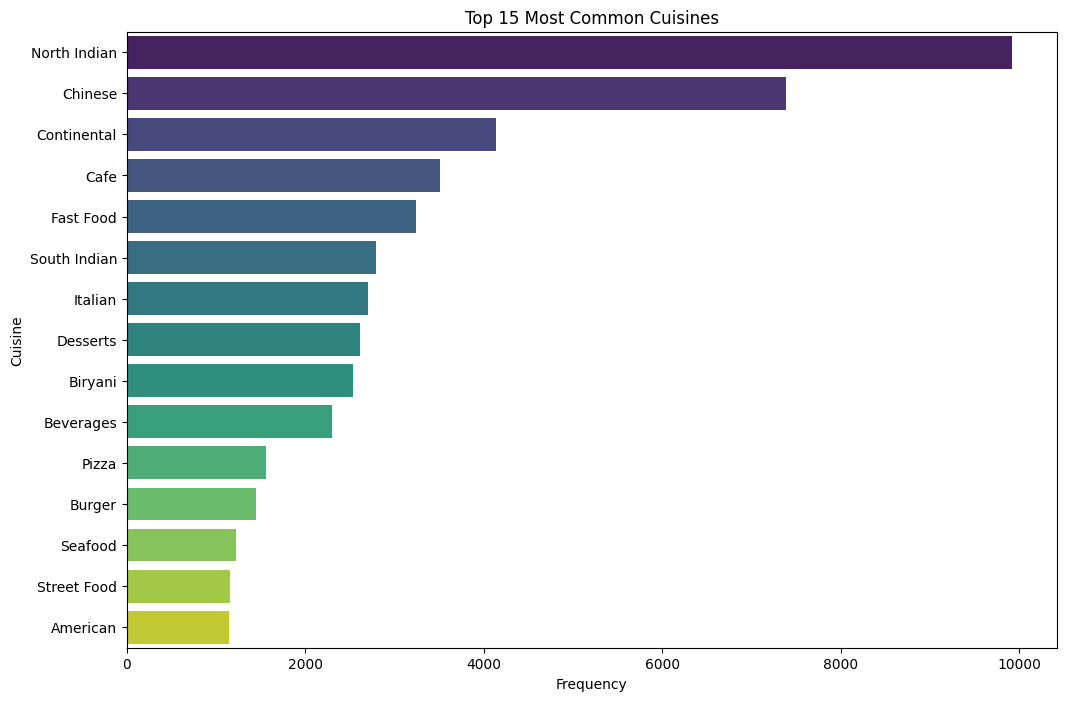

In [16]:
# Step 1: Split the 'cuisines' column into individual cuisines
# Expand cuisines into a list for counting, splitting by ', '
cuisine_list = df['cuisines'].str.split(', ').sum()

# Step 2: Count frequency of each cuisine using Counter
cuisine_counts = Counter(cuisine_list)

# Convert to a DataFrame for easy plotting
cuisine_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Frequency'])
cuisine_df = cuisine_df.sort_values(by='Frequency', ascending=False)

# Step 3: Plot the most common cuisines
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Cuisine', data=cuisine_df.head(15), palette='viridis')
plt.title('Top 15 Most Common Cuisines')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.show()


C:\Users\kulwa\AppData\Local\Temp\ipykernel_7244\3929070208.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Restaurant Type', data=rest_type_df.head(15), palette='magma')


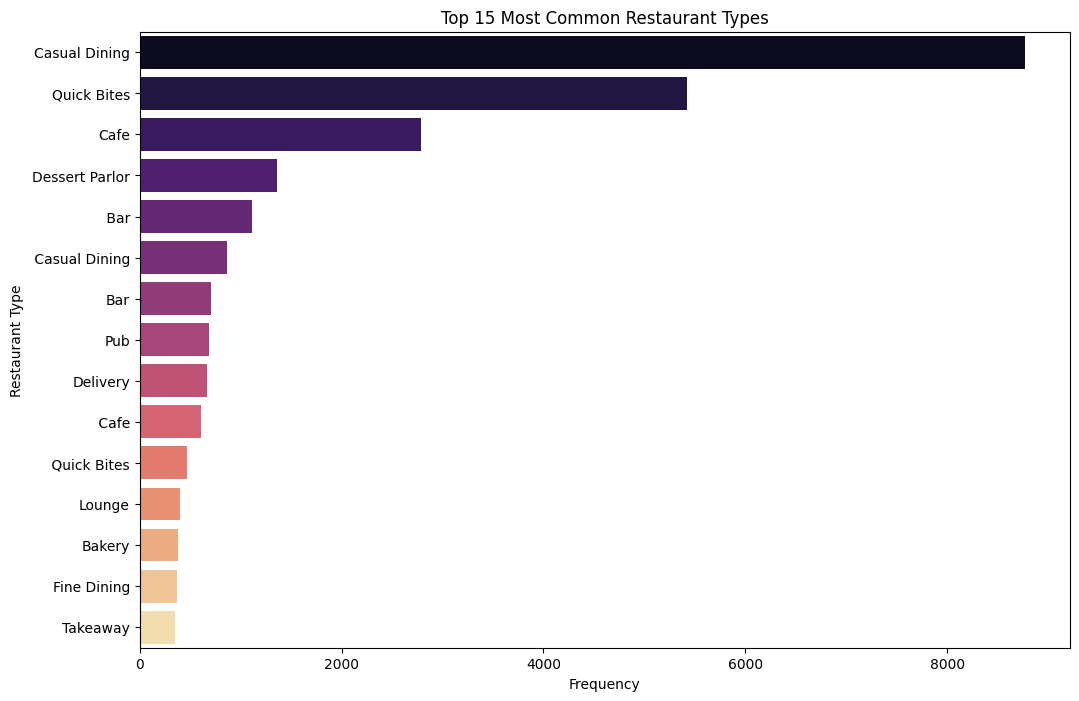

In [17]:
# Step 1: Count frequency of each restaurant type
# If 'rest_type' contains multiple types separated by commas, split them and flatten
# Here we assume single values per entry; modify if there are multiple
rest_type_list = df['rest_type'].str.split(',').sum()
rest_type_counts = Counter(rest_type_list)

# Convert to a DataFrame for easier sorting and plotting
rest_type_df = pd.DataFrame(rest_type_counts.items(), columns=['Restaurant Type', 'Frequency'])
rest_type_df = rest_type_df.sort_values(by='Frequency', ascending=False)

# Step 3: Plot the most common restaurant types
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Restaurant Type', data=rest_type_df.head(15), palette='magma')
plt.title('Top 15 Most Common Restaurant Types')
plt.xlabel('Frequency')
plt.ylabel('Restaurant Type')
plt.show()


Multi-hot encoding for cuisines

In [18]:
# Step 1: Split cuisines by comma and strip any extra whitespace
df['cuisines_list'] = df['cuisines'].apply(lambda x: [cuisine.strip() for cuisine in x.split(',')])

# Step 2: Use MultiLabelBinarizer for multi-hot encoding
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
cuisine_encoded = mlb.fit_transform(df['cuisines_list'])

# Step 3: Convert the encoded array to a DataFrame with cuisine names as columns
cuisine_encoded_df = pd.DataFrame(cuisine_encoded, columns=mlb.classes_)

# Step 5: Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, cuisine_encoded_df], axis=1)

# Drop the temporary 'cuisines_list' column if desired
df = df.drop(columns=['cuisines_list'])

# Display the updated DataFrame with encoded cuisine columns
print(df.head())


                    name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)

In [19]:
df['online_order']# Convert 'online_order' to binary (1 for 'Yes', 0 for 'No')
df['online_order'] = df['online_order'].apply(lambda x: 1 if x == 'Yes' else 0)

# If you also need to do the same for 'book_table', you can use the same method:
# Convert 'book_table' to binary (1 for 'Yes', 0 for 'No')
df['book_table'] = df['book_table'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display the updated columns
print(df[['online_order', 'book_table']].head())


   online_order  book_table
0             1           1
1             1           0
2             1           0
3             0           0
4             0           0


In [20]:
df['online_order']

0        1
1        1
2        1
3        0
4        0
        ..
23041    1
23042    0
23043    0
23044    0
23045    0
Name: online_order, Length: 23046, dtype: int64

In [21]:
df['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

Working on reviews

In [22]:
df['cleaned_reviews'] = df['reviews_list'].str.replace(r'Rated \d+\.\d+: ', '', regex=True)
df['cleaned_reviews'] = df['cleaned_reviews'].str.replace(r'[^\w\s]', '', regex=True)

In [23]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

df['cleaned_reviews'] = df['cleaned_reviews'].apply(remove_stop_words)


In [24]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=500)  # Adjust the number of features as needed
X_reviews = vectorizer.fit_transform(df['cleaned_reviews']).toarray()


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=500)
X_reviews_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_reviews']).toarray()


In [27]:
X_reviews_weighted_tfidf = X_reviews_tfidf * df['sentiment'].values[:, np.newaxis]


In [28]:
X = np.concatenate([df[['votes', 'sentiment']].values, X_reviews_weighted_tfidf], axis=1)


In [29]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

Clustering

In [30]:
cluster_features = df[['Normalized Rating', 'sentiment', 'approx_cost(for two people)', 'online_order', 'book_table']]

cluster_features = pd.concat([cluster_features, cuisine_encoded_df], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

K-Means

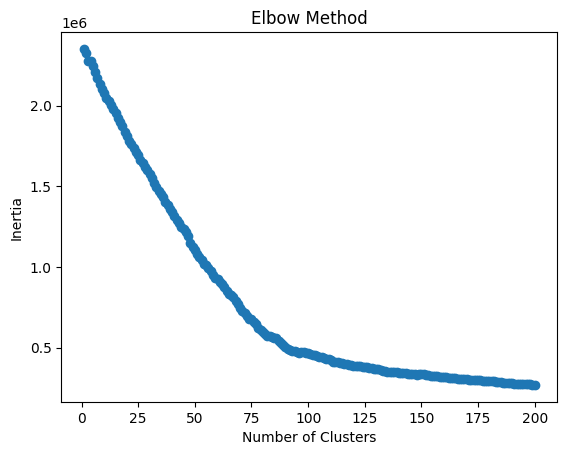

                    name  cluster
0                  Jalsa       30
1         Spice Elephant       30
2        San Churro Cafe       81
3  Addhuri Udupi Bhojana       11
4          Grand Village       39


In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 201):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 201), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# After choosing the optimal number of clusters, say K = 85:
kmeans = KMeans(n_clusters=85, random_state=42)
df['cluster'] = kmeans.fit_predict(cluster_features_scaled)

# Check the clustering results
print(df[['name', 'cluster']].head())


In [32]:
labels = kmeans.labels_
for cluster_num in range(1):
    print(f"Cluster {cluster_num}:")
    cluster_data = df[labels == cluster_num]
    print(cluster_data)

Cluster 0:
                               name  online_order  book_table  rate  votes  \
409             Hiyar Majhe Kolkata             1           0   4.0    244   
462                        Amontron             1           0   3.9    435   
495                 Bhojohori Manna             1           0   3.7    662   
512                 The Bong Palate             1           0   3.8     58   
527                      Bangaliana             1           0   2.9    153   
...                             ...           ...         ...   ...    ...   
22864  Annapurna Bengali Restaurant             0           0   3.9     50   
22894                       Majlish             0           0   3.6     79   
22931                         Petuk             1           0   3.7     79   
22947                  Friend's Own             1           0   3.2     55   
22989                    Radha Rani             1           0   3.4    252   

                location      rest_type  \
409      

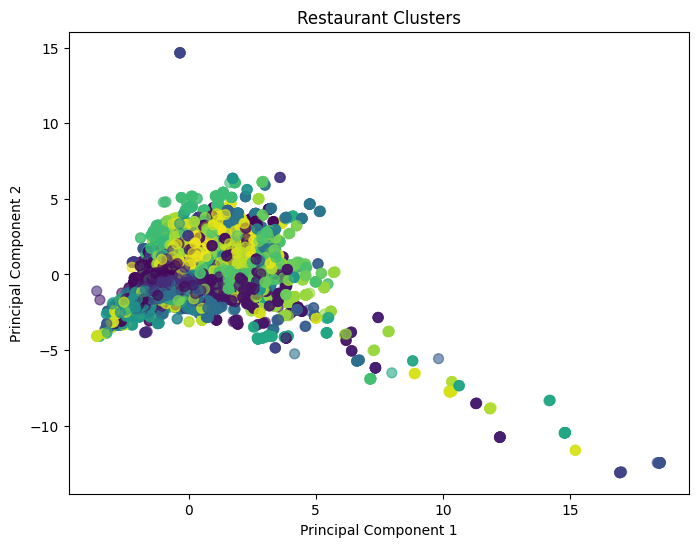

In [33]:
from sklearn.decomposition import PCA

# Use PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(cluster_features_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Restaurant Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [34]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(cluster_features_scaled, df['cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.210024384741621


In [35]:
# Print the cluster centers (centroids)
print("Cluster Centers: ")
print(kmeans.cluster_centers_)

# Inspect the features that contribute most to each cluster
feature_names = cluster_features.columns
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}:")
    for feature, value in zip(feature_names, center):
        print(f"{feature}: {value}")
    print("-" * 40)


Cluster Centers: 
[[-0.15535619 -0.50816411  0.35539704 ... -0.01613743 -0.08228742
  -0.0466293 ]
 [ 0.02945987  0.14220989 -0.17061005 ... -0.01613743 -0.08228742
  -0.0466293 ]
 [-0.59902482 -0.19611758  0.04719265 ... -0.01613743 -0.08228742
  -0.0466293 ]
 ...
 [ 0.07528021  0.10783319  0.67521204 ... -0.01613743 -0.08228742
  -0.0466293 ]
 [ 1.07330861 -0.16771491 -1.34978601 ... -0.01613743 -0.08228742
  -0.0466293 ]
 [ 0.55130234  0.53966962 -1.35049996 ... -0.01613743 -0.08228742
  -0.0466293 ]]
Cluster 0:
Normalized Rating: -0.1553561929669605
sentiment: -0.5081641128833324
approx_cost(for two people): 0.3553970361880357
online_order: 0.42111017027395664
book_table: -0.2922397920141987
Afghan: -0.04568520561408302
Afghani: -0.01863470862816859
African: -0.02716982998284359
American: -0.22875481879796028
Andhra: -0.1909817463377726
Arabian: -0.14615560452446716
Asian: -0.17646843879892601
Assamese: -0.029471737997130872
Awadhi: -0.025520503114115967
BBQ: -0.15766676032344532
B

In [38]:
def suggest_restaurant(df):
    print("Welcome to the Restaurant Recommender!")
    
    # 1. Cuisine preference (User can input a comma-separated list)
    cuisine_input = input("Enter preferred cuisine(s) (comma separated, e.g., Italian, Chinese): ").split(',')
    cuisine_input = [cuisine.strip().lower() for cuisine in cuisine_input]
    
    # 2. Price range (approximate cost for two people, user can enter a range or a specific value)
    min_cost = float(input("Enter minimum cost for two people (e.g., 200): "))
    max_cost = float(input("Enter maximum cost for two people (e.g., 1000): "))
    
    # 3. Online order preference (Yes/No)
    online_order_input = input("Do you prefer restaurants that offer online orders? (Yes/No): ").strip().lower()
    online_order = 1 if online_order_input == 'yes' else 0
    
    # 4. Rating preference (User can specify a minimum rating)
    min_rating = float(input("Enter minimum rating preference (e.g., 3.5): "))
    
    # Filter the restaurants based on the user's input
    
    # Filter by cuisine: Match cuisines (case-insensitive)
    matching_cuisines = df[df['cuisines'].apply(lambda x: any(cuisine.strip().lower() in x.lower() for cuisine in cuisine_input))]
    
    # Filter by cost: Approximate cost for two people should be within the user-defined range
    matching_cost = matching_cuisines[(matching_cuisines['approx_cost(for two people)'] >= min_cost) & 
                                      (matching_cuisines['approx_cost(for two people)'] <= max_cost)]
    
    # Filter by online order preference
    matching_online_order = matching_cost[matching_cost['online_order'] == online_order]
    
    # Filter by rating preference
    matching_rating = matching_online_order[matching_online_order['rate'] >= min_rating]
    
    # If no matching restaurants, return a message
    if matching_rating.empty:
        print("Sorry, no restaurants match your criteria.")
    else:
        # Show the matching restaurants (you can limit the number of results shown)
        print("\nHere are some restaurant suggestions based on your preferences:")
        print(matching_rating[['name', 'cuisines', 'approx_cost(for two people)', 'online_order', 'rate']].head(10))

suggest_restaurant(df)


Welcome to the Restaurant Recommender!

Here are some restaurant suggestions based on your preferences:
                name                                           cuisines  \
8308         Kylie's                                     Asian, Chinese   
17458       Fishland                     Seafood, North Indian, Chinese   
17884  RS Shiv Sagar  Chinese, North Indian, South Indian, Street Fo...   
21000  RS Shiv Sagar  Chinese, North Indian, South Indian, Street Fo...   

       approx_cost(for two people)  online_order  rate  
8308                         500.0             0   4.2  
17458                        500.0             0   4.2  
17884                        500.0             0   4.2  
21000                        500.0             0   4.2  
